In [2]:
#install.packages("DMwR")
#install.packages("dprep")

library(DMwR)

also installing the dependencies ‘cluster’, ‘miniUI’, ‘proxy’, ‘clue’, ‘survey’, ‘RANN’, ‘lpSolve’, ‘crosstalk’, ‘manipulateWidget’, ‘e1071’, ‘FNN’, ‘StatMatch’, ‘rgl’

Warning message in install.packages("dprep"):
“installation of package ‘survey’ had non-zero exit status”Warning message in install.packages("dprep"):
“installation of package ‘StatMatch’ had non-zero exit status”Warning message in install.packages("dprep"):
“installation of package ‘rgl’ had non-zero exit status”Warning message in install.packages("dprep"):
“installation of package ‘dprep’ had non-zero exit status”Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Loading required package: lattice
Loading required package: grid


# Local Outlier Factor (LOF)

In [17]:
iris_df <- iris[, 1:4]
scores <- lofactor(iris_df, k=5)
summary(scores)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.9149  0.9988  1.0491  1.1260  1.2270  2.4800 

In [14]:
plot_outliers = function(data, outliers) {    
    xy <- prcomp(data)$x[, 1:2]
    pch <- rep(".", nrow(xy))
    pch[outliers] <- "+"
    plot(xy, pch=pch)
}

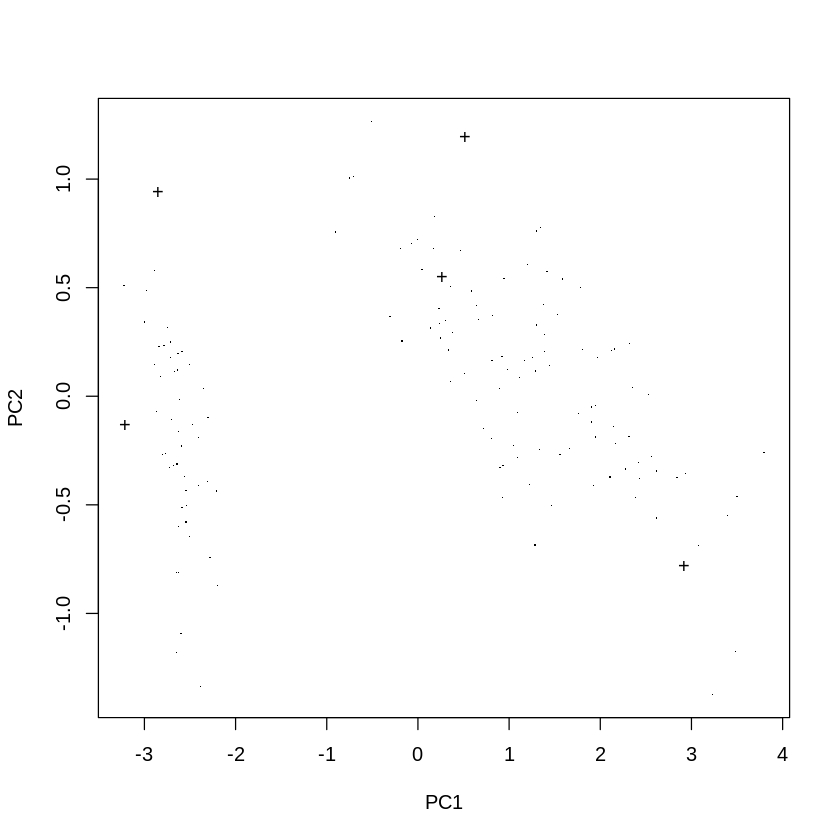

In [18]:
outliers <- order(scores, decreasing=T)[1:5]
plot_outliers(iris_df, outliers)

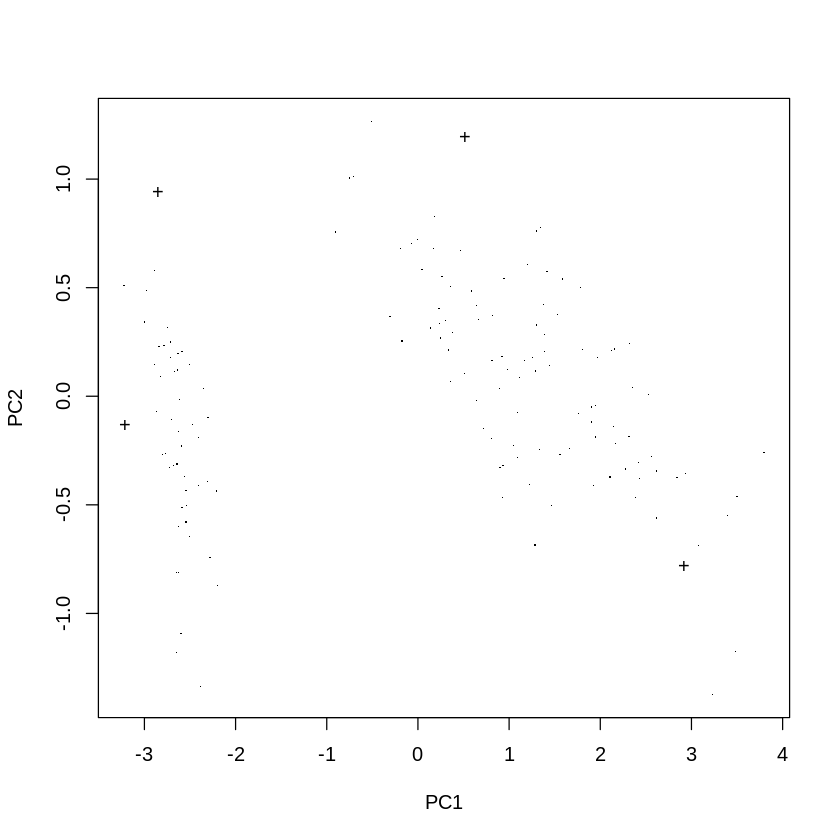

In [19]:
outliers <- which(scores > 1.6)
plot_outliers(iris_df, outliers)

# Distância ao centroide mais próximo

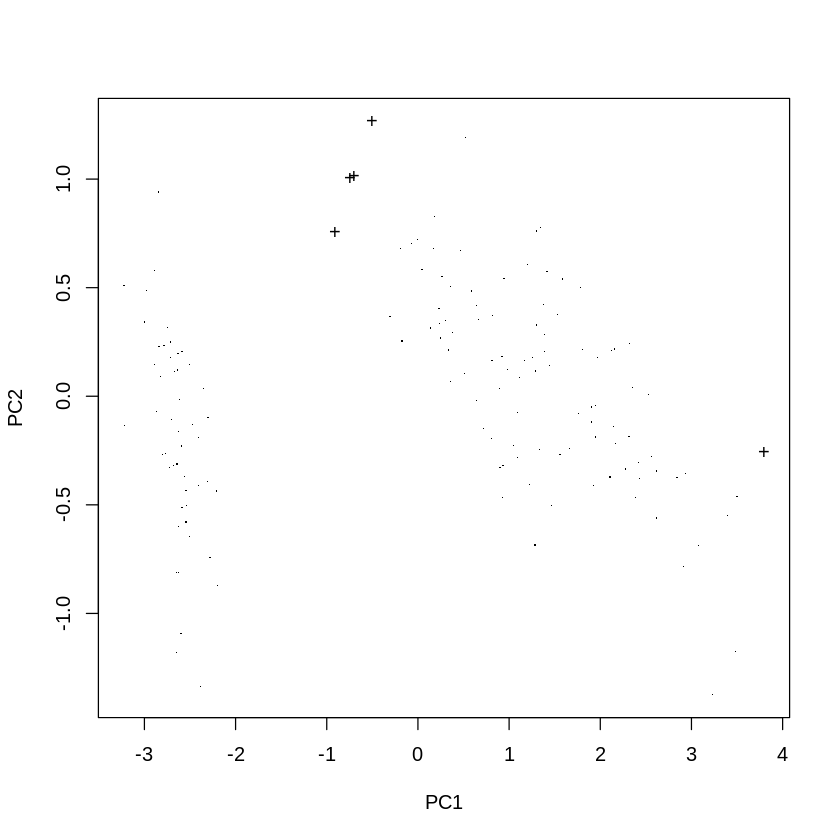

In [20]:
set.seed(1234)
r <- kmeans(iris_df, 3)
centers <- r$centers[r$cluster,]
distances <- sqrt(rowSums((iris_df - centers)^2))
scores <- distances
outliers <- order(scores, decreasing=T)[1:5]

plot_outliers(iris_df, outliers)

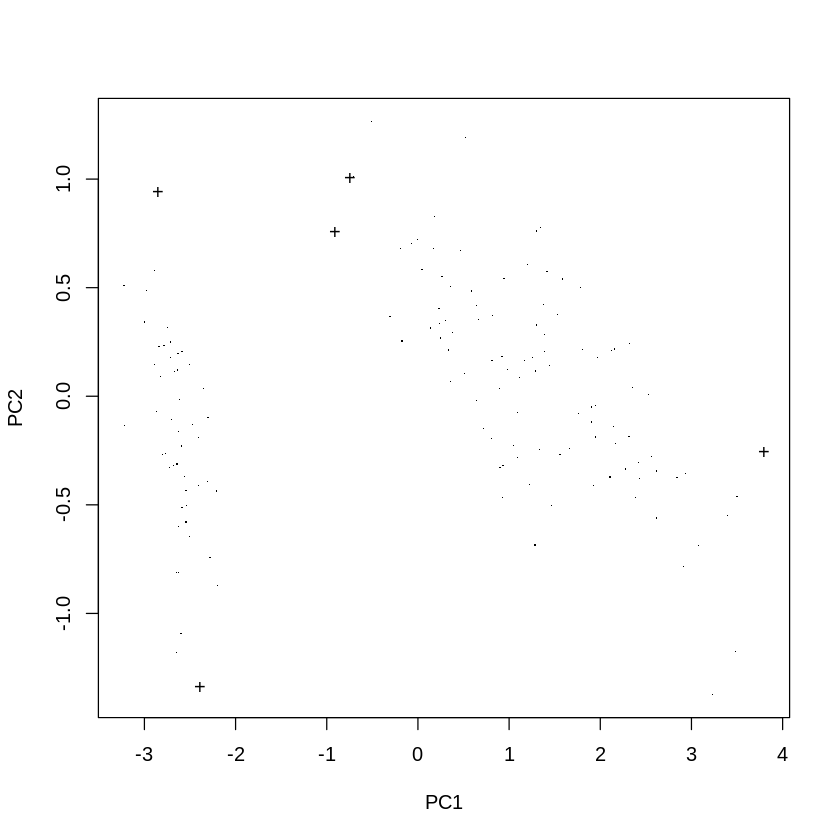

In [22]:
mcr <- ave(distances, r$cluster, FUN=mean)
scores <- distances / mcr
outliers <- order(scores, decreasing=T)[1:5]

plot_outliers(iris_df, outliers)